In [6]:
# Import all necessary string and NLP-related libraries
import requests
import string
from bs4 import BeautifulSoup
from textblob import TextBlob
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')# Punkt tokenizer is a pre-trained, unsupervised machine learning model provided by NLTK for sentence tokenization

# Initialize all the required variables
count = 1
sentiment_scores = []
subjectivity_scores = []
total_words = []

# Function to process the article text
def process_article_text(article_text):
    article_text = ''.join([char for char in article_text if char not in string.punctuation]) # Extracting unique words and excluding punctuation
    blob = TextBlob(article_text) # Using TextBlob for tokenization and lowering case

    stop_words = set(stopwords.words('english')) # Standard dataset of stop words
    filtered_words = [word for word in blob.words.lower() if word not in stop_words] # Removing stop words

    filtered_text = " ".join(filtered_words) # Filtered version of the blob
    return TextBlob(filtered_text)

# Function to analyze sentiment and print results
def analyze_sentiment(count, fblob):
    # Get the sentiment polarity (ranges from -1 to 1)
    # Negative values indicate negative sentiment, positive values indicate positive sentiment.
    # Values around 0 indicate a more neutral sentiment.
    sentiment_polarity = fblob.sentiment.polarity
    # Get the sentiment subjectivity (ranges from 0 to 1)
    # Subjectivity is a measure of how subjective or objective the text is.
    # 0 is very objective, 1 is very subjective.
    sentiment_subjectivity = fblob.sentiment.subjectivity

    print(f"For article number: {count}")
    print(f"Sentiment Polarity: {sentiment_polarity}")
    print(f"Sentiment Subjectivity: {sentiment_subjectivity}")

    if sentiment_polarity > 0.1:
        print("The text is positive.")
    elif sentiment_polarity < -0.1:
        print("The text is negative.")
    else:
        print("The text is neutral.")

# Begin web-scraping
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'}
url = 'https://www.morningstar.co.uk/uk/collection/100065/esg.aspx' # Website to be scraped for articles
response = requests.get(url, headers=headers) # Response code=200 indicates successful connection and access
soup = BeautifulSoup(response.text, 'html.parser') # Python library for scraping and parsing HTML structures of websites

article_title = soup.find_all('td', {'headers': 'archive_title'})


for item in article_title:
    link = item.find('a')['href'] # Link to individual articles to be parsed for text and sentiment analysis
    r = requests.get(link)
    soupy = BeautifulSoup(r.content, 'html.parser')
    article_content = soupy.find('div', {'class': 'mainContent fontsize12'}) # Obtaining main body of the article
    article_text = article_content.get_text() # Extracting human-readable text

    # Process the article text
    fblob = process_article_text(article_text)
    all_words = [word.lower() for word in fblob.words] # Ensuring all the words are in lower case
    total_words.extend(all_words) # Making a list of the entire set of words appearing across all articles

    # Analyze sentiment and store scores
    sentiment_polarity = fblob.sentiment.polarity
    sentiment_subjectivity = fblob.sentiment.subjectivity
    sentiment_scores.append(sentiment_polarity)
    subjectivity_scores.append(sentiment_subjectivity)

    # Print sentiment analysis results
    analyze_sentiment(count, fblob)
    count += 1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


For article number: 1
Sentiment Polarity: 0.06652517235850569
Sentiment Subjectivity: 0.42235169151835816
The text is neutral.
For article number: 2
Sentiment Polarity: 0.19351190476190475
Sentiment Subjectivity: 0.45945845004668534
The text is positive.
For article number: 3
Sentiment Polarity: 0.035470085470085476
Sentiment Subjectivity: 0.3617521367521368
The text is neutral.
For article number: 4
Sentiment Polarity: 0.05874028749028749
Sentiment Subjectivity: 0.3391052964129887
The text is neutral.
For article number: 5
Sentiment Polarity: 0.07492252066115704
Sentiment Subjectivity: 0.40130198084743535
The text is neutral.
For article number: 6
Sentiment Polarity: 0.08660914702581371
Sentiment Subjectivity: 0.328353976270643
The text is neutral.
For article number: 7
Sentiment Polarity: 0.09352798392084108
Sentiment Subjectivity: 0.42306575963718823
The text is neutral.
For article number: 8
Sentiment Polarity: 0.09995638200183656
Sentiment Subjectivity: 0.34477010363374
The text i

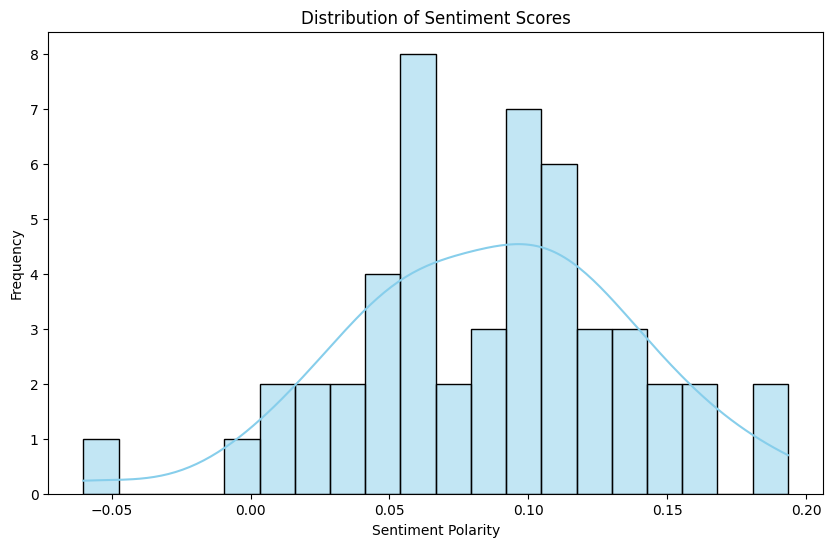

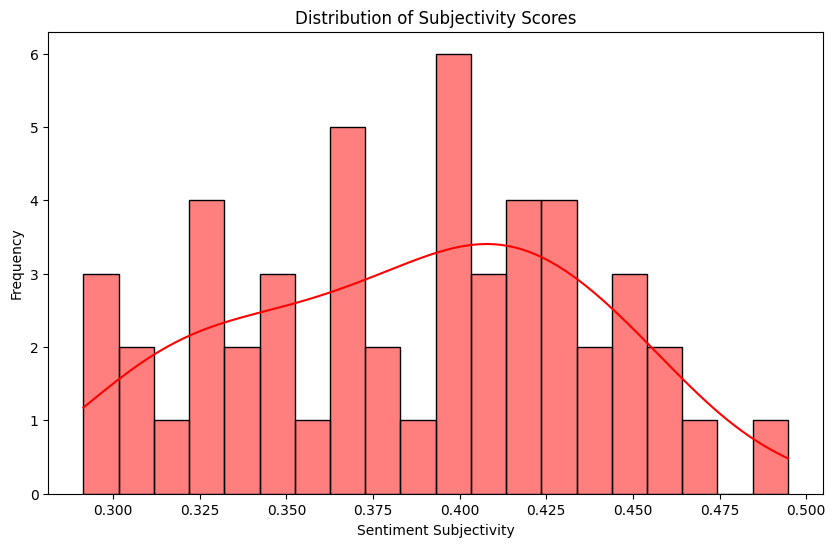


Top Most Common Words:
esg: 316
funds: 296
sustainable: 246
investors: 224
companies: 218
climate: 187
investment: 149
article: 146
managers: 137


In [7]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(sentiment_scores, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Distribution of subjectivity scores
plt.figure(figsize=(10, 6))
sns.histplot(subjectivity_scores, bins=20, kde=True, color='red')
plt.title('Distribution of Subjectivity Scores')
plt.xlabel('Sentiment Subjectivity')
plt.ylabel('Frequency')
plt.show()

# Printing most common words
common_words = Counter(total_words).most_common(10)
filtered_common_words = [(word, count) for word, count in common_words if word.isalnum()]  # Excluding any punctuation marks such as the apostrophe (')

print("\nTop Most Common Words:")
for word, count in filtered_common_words:
    print(f"{word}: {count}")